<a href="https://colab.research.google.com/github/diogodsa/Arvore-de-Decisao/blob/master/%C3%81rvore_de_Decis%C3%A3o_para_tarefas_de_classifica%C3%A7%C3%A3o_e_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Árvore de Decisão para tarefas de classificação e regressão

 

#### Motivação


- Árvore de classificação

- Árvore de regressão

- Separação da base em treinamento e teste

- Matriz de Confusão

- Métricas de avaliação: MAE e RMSE

 

________________________________________________________


In [1]:
# Carregando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


In [2]:
# Carregando a base de dados e fazendo os checks iniciais

# Muda o diretorio de trabalho
import os
os.chdir("Bases de Dados")

df1 = pd.read_csv("bill_authentication.csv")

In [ ]:
# sobre a base de dados
# https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [3]:
df1.shape

(1372, 5)

In [4]:
df1.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df1.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
# Separando os dados com as variaveis em x e o alvo em y
 
x1 = df1.drop('Class', axis=1)
y1 = df1['Class']

In [7]:
df1.columns[0:4]

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

In [8]:
# Serpando os dados entre treinamento e teste
# Para isto precisamos da funçao train_test_split da biblioteca sklearn
# Se der qualquer problema na instalaçao da biblioteca pelo Anaconda, instale via pip
# pip install sklearn

from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.30)

In [9]:
# Treinamento da arvore de decisao para a tarefa de classificaçao - reveja a aula de tarefas de data mining se preciso

from sklearn.tree import DecisionTreeClassifier

mod_arvore1 = DecisionTreeClassifier()

mod_arvore1.fit(x_train1, y_train1) # essa é a linha que treina o modelo!!!!

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
# Prediçoes para o teste

y_pred_test1 = mod_arvore1.predict(x_test1)

In [11]:
# Como availar os resultados?

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test1, y_pred_test1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test1, y_pred_test1))

[[242   2]
 [  3 165]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       244
           1       0.99      0.98      0.99       168

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [12]:
# Acuràcia do modelo
import sklearn.metrics as metrics

print("Acuracia:", round(metrics.accuracy_score(y_test1, y_pred_test1),3))

Acuracia: 0.988


In [ ]:
# Para visualizar a arvore de decisao, siga estes passos, nesta ordem:

# 1 - Download deste arquivo - https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi
# 2 - Instalaçao das bibliotecas graphviz e pydotplus
# 3 - Rode o codigo a seguir toda vez que quiser plotar:

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

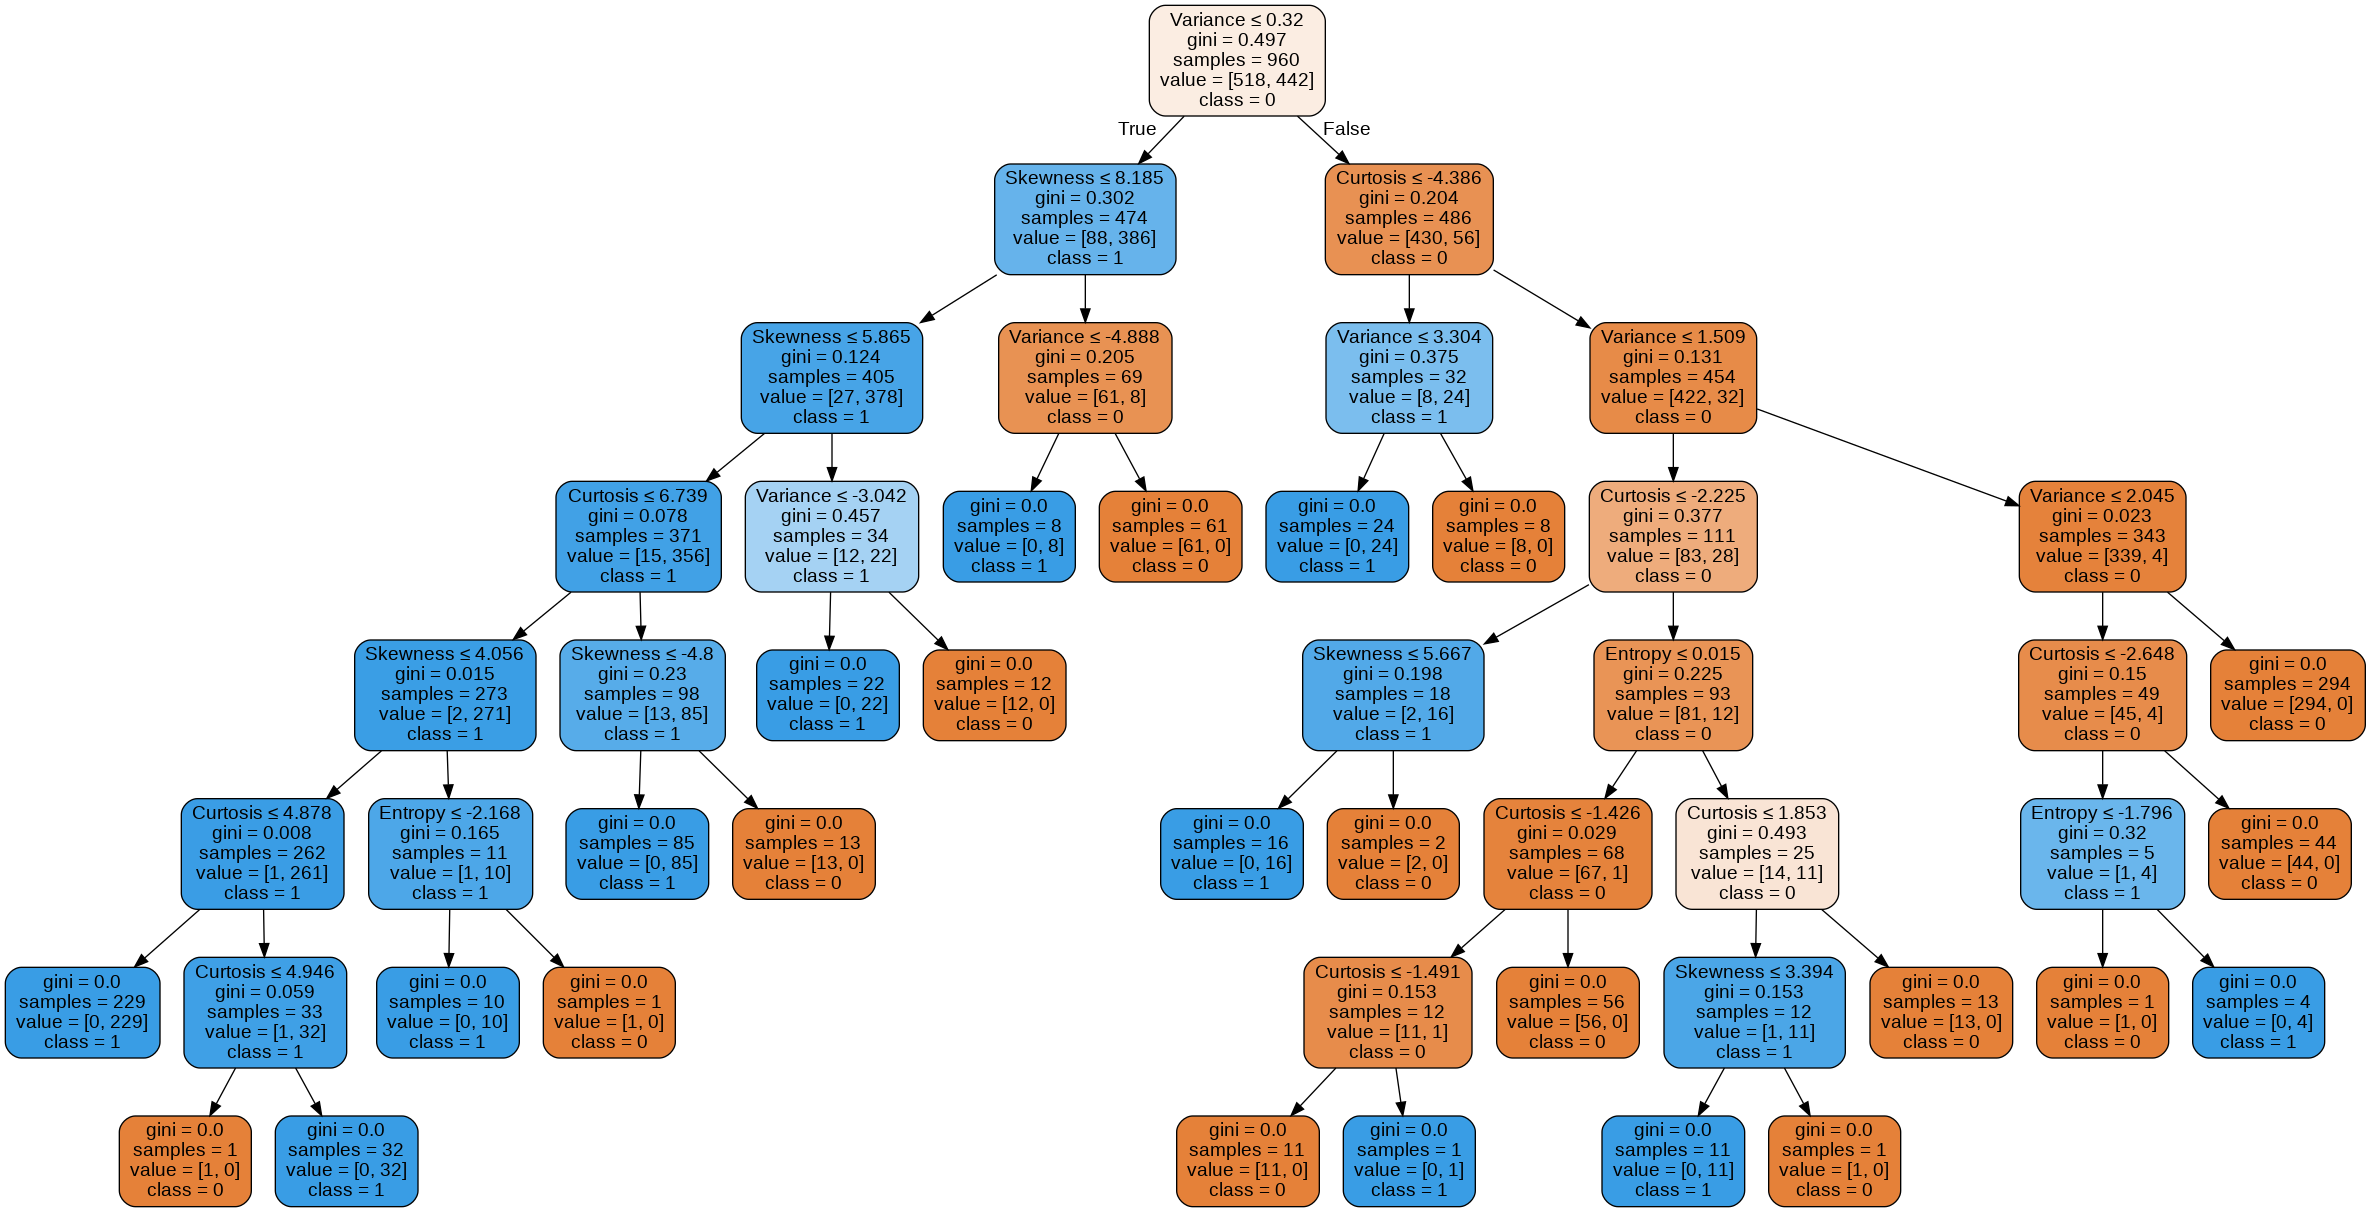

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(mod_arvore1
                , out_file = dot_data
                , filled = True
                , rounded = True
                , special_characters = True
                , feature_names = df1.columns[0:4]
                , class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

___________________________________________________

## Árvore de Decisão para a tarefa regressão

In [ ]:
# Carregando a base de dados e fazendo os testes iniciais

df2 = pd.read_csv("petrol_consumption.csv")

In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
df2.describe()

In [ ]:
# Separando os dados com as variaveis em x e o alvo em y

x2 = df2.drop('Petrol_Consumption', axis=1)

y2 = df2['Petrol_Consumption']

In [ ]:
# Serpando os dados entre treinamento e teste
# Para isto precisamos da funçao train_test_split da biblioteca sklearn

from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=0)

In [ ]:
# Treinamento da arvore de decisao para a tarefa de regressao - reveja a aula de tarefas de data mining se preciso
# Repare que muda o import que fazemos do sklearn

from sklearn.tree import DecisionTreeRegressor

mod_arvore2 = DecisionTreeRegressor()

mod_arvore2.fit(x_train2, y_train2)

In [ ]:
# Prediçoes para o teste

y_pred_test2 = mod_arvore2.predict(x_test2)

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(mod_arvore2
                , out_file=dot_data
                , filled=True
                , rounded=True
                , special_characters=True
                , feature_names = df2.columns[0:4]
                , class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

In [ ]:
# Avaliar os resultados de uma regressao é diferente de avaliar de uma classificaçao
# Como os resultados sao continuos, nao podemos usar a matriz de confusao

df2_aval = pd.DataFrame({'Real':y_test2, 'Previsto':y_pred_test2})

df2_aval

In [ ]:
# Para isto, vamos usar duas métricas muito aceitas no mercado
# O erro médio absoluto - MAE - Mean Absolute Error - a métrica que eu prefiro
# O erro médio quadrado - RMSE - sendo essa a métrica mais comum de avaliaçao

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred_test2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_test2)))

In [ ]:
# Como avaliar estas métricas?
# Fazendo uma comparaçao entre treinamento e teste - Nao é o caso na arvore regressora, porque o MAE no treinamento serà 0
# Prova:

print('MAE - Treinamento:', metrics.mean_absolute_error(y_train2, mod_arvore2.predict(x_train2)))

print('MAE - Teste:', metrics.mean_absolute_error(y_test2, y_pred_test2))

In [ ]:
# Olhando apenas para a base de teste

print("A média do consumo de de combustivel da base é:")
print(y_test2.mean())
print()
print("O percentual do MAE em relaçao a média da base: ")
print(round(metrics.mean_absolute_error(y_test2, y_pred_test2)/y_test2.mean()*100,2))

In [ ]:
# Numeros razoaveis sao aqueles abaixo de 10%. O modelo poderia ser melhor :|

In [ ]:
# Acuràcia do modelo - nao vai fazer sentido porque nao é variavel binaria - classificaçao!

print("Acuracia:",metrics.accuracy_score(y_test2, y_pred_test2))

__________________________________

#### Na proxima aula vamos falar sobre como podar as arvores de decisao para melhorar a performance e evitar o overfitting